In [ ]:
import numpy as np
from threshold import * 
from calibration import calibrate
import cv2
import glob
import matplotlib.pyplot as plt

1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

In [277]:
calibration.calibrate()

AttributeError: module 'calibration' has no attribute 'calibrate'

In [22]:
import pickle
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "dist_pickle.p", "wb" ))

2. Apply a distortion correction to raw images.

In [ ]:
dst = cv2.undistort(img, mtx, dist, None, mtx)

In [23]:
cv2.imwrite('./camera_cal/calibration2_undist.jpg',dst)

True

In [24]:
%matplotlib inline

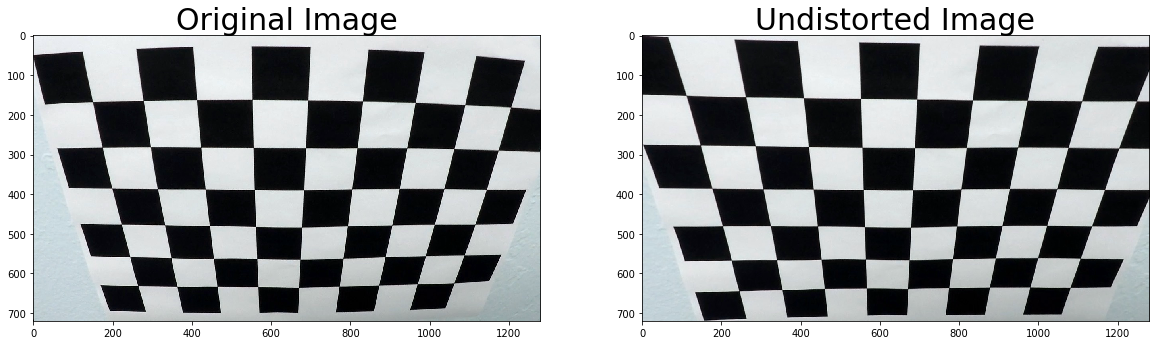

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

3. Use color transforms, gradients, etc., to create a thresholded binary image.

In [26]:
test_path = 'test_images/straight_lines2.jpg'

In [27]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=[0,255]):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply cv2.Sobel()
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel) 
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the output from cv2.Sobel()
    abs_sobel = np.absolute(sobel)
    # Scale the result to an 8-bit range (0-255)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    print(np.min(scaled_sobel))
    print(np.max(scaled_sobel))
    # Apply lower and upper thresholds
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    # Create binary_output
    return binary_output

0
255


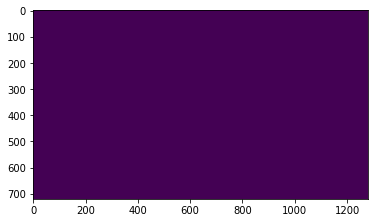

In [28]:
test = cv2.imread(test_path)
sobel = abs_sobel_thresh(test, (50,200))
plt.imshow(sobel )

In [29]:
%matplotlib inline

In [30]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output

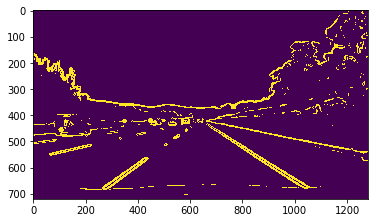

In [31]:
test = cv2.imread(test_path)
sobel = mag_thresh(test, sobel_kernel=25, mag_thresh=[50,255])
plt.imshow(sobel )

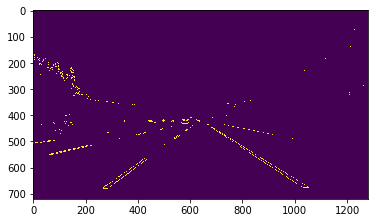

In [32]:
test = cv2.imread(test_path)
sobel = mag_thresh(test, sobel_kernel=3, mag_thresh=[100,200])
plt.imshow(sobel )

In [33]:
# Define a function to threshold an image for a given range and Sobel kernel
def dir_threshold(img, sobel_kernel=3, thresh=(0., np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    print(np.min(absgraddir))
    print(np.max(absgraddir))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

0.0
1.57079632679


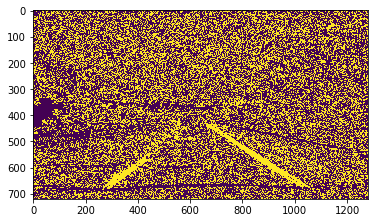

In [34]:
image = cv2.imread(test_path)
sobel = dir_threshold(image, sobel_kernel=15, thresh=[0.7,1.3])
plt.imshow(sobel )

In [35]:
ksize=3

In [36]:
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(100, 200))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(100, 200))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(100, 200))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))

0
255
0
255
0.0
1.57079632679


In [37]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

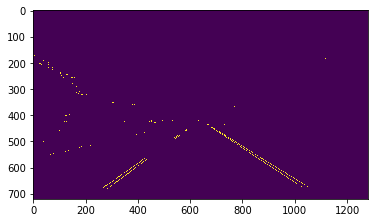

In [38]:
plt.imshow(combined)

In [44]:
hls = cv2.cvtColor(rgb, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

In [42]:
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [47]:
r = rgb[:,:,1]

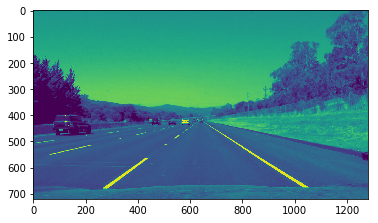

In [48]:
plt.imshow(r)

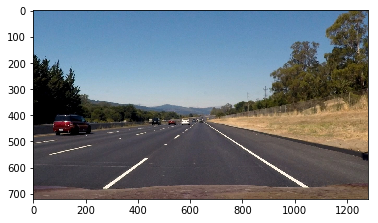

In [46]:
plt.imshow(rgb)

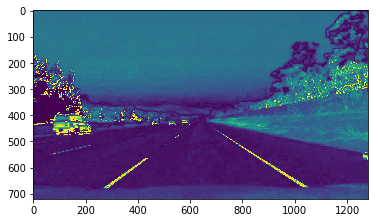

In [45]:
plt.imshow(s_channel)

In [53]:
s_thresh_min = 100
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

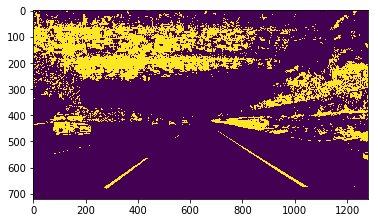

In [54]:
plt.imshow(s_binary)

In [71]:
r_binary = np.zeros_like(r)

In [72]:
r_binary[(r >= 170) & (r <= 255)] = 1

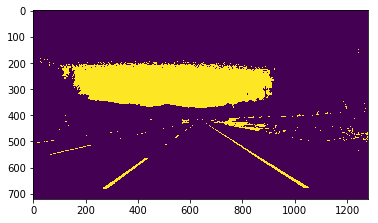

In [73]:
plt.imshow(r_binary)

In [76]:
combined_total = np.zeros_like(r_binary)

In [77]:
combined_total[(combined == 1) | (r_binary == 1)] = 1

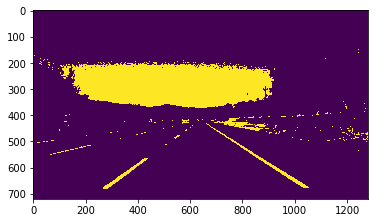

In [78]:
plt.imshow(combined_total)

In [79]:
import pickle

In [85]:
with open('dist_pickle.p', mode='rb') as f:
    dist_d = pickle.load(f)

In [86]:
dist = dist_d['dist']
mtx = dist_d['mtx']

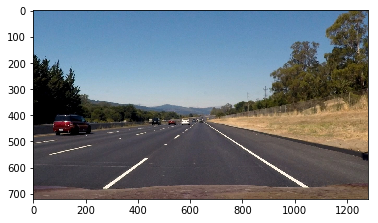

In [83]:
plt.imshow(rgb)

In [152]:
undist = cv2.undistort(rgb, mtx, dist, None, mtx)
undist2 = cv2.undistort(combined_total, mtx, dist, None, mtx)

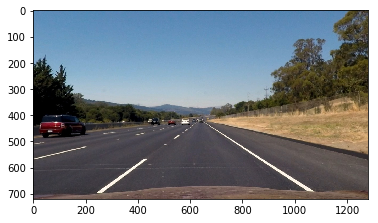

In [92]:
plt.imshow(undist)

In [128]:
cv2.imshow("image", undist)
cv2.destroyAllWindows()

In [102]:
source = np.float32([[610, 410], [630, 410], [230, 700], [1050, 700]])
dest = np.float32([[350,0], [1000,0], [350, 700], [1000, 700]])

In [110]:
M = cv2.getPerspectiveTransform(source, dest)

In [129]:
cv2.imwrite('test_images/undist.jpg',  undist)

True

In [114]:
warped = cv2.warpPerspective(undist, M, (1280, 720))

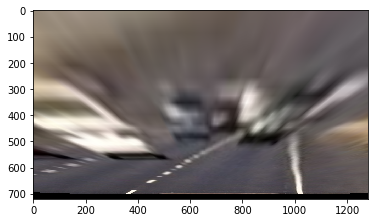

In [115]:
plt.imshow(warped)

In [157]:
top_left_dst = [350,0]
top_right_dst = [1000,0]
bottom_left_dst = [350,700]
bottom_right_dst = [1000,700]

In [143]:
top_left = [430,568]
top_right = [870,568]
bottom_left = [253,693]
bottom_right = [1071,693]

In [158]:
top_left = [555,478]
top_right = [736,478]
bottom_left = [253,693]
bottom_right = [1071,693]

In [195]:
top_left = [627,427.5]
top_right = [657,427.5]
bottom_left = [253,693]
bottom_right = [1071,693]

In [218]:
top_left = [615,436.5]
top_right = [667.5,436.5]
bottom_left = [253,693]
bottom_right = [1071,693]

In [241]:
top_left = [585,456]
top_right = [700.5,456]
bottom_left = [253,693]
bottom_right = [1071,693]

In [242]:
source = np.float32([top_left, top_right, bottom_left, bottom_right])

In [243]:
dest = np.float32([top_left_dst, top_right_dst, bottom_left_dst, bottom_right_dst])

In [244]:
M = cv2.getPerspectiveTransform(source, dest)

In [245]:
warped = cv2.warpPerspective(undist, M, (1280, 720))

In [246]:
warped2 = cv2.warpPerspective(undist2, M, (1280, 720))

In [247]:
undist.shape

(720, 1280, 3)

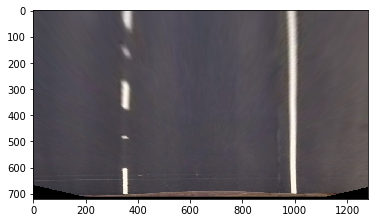

In [248]:
plt.imshow(warped)

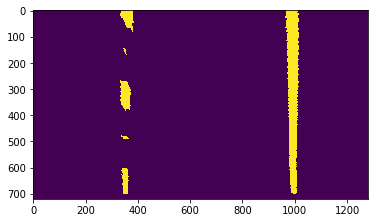

In [249]:
plt.imshow(warped2)

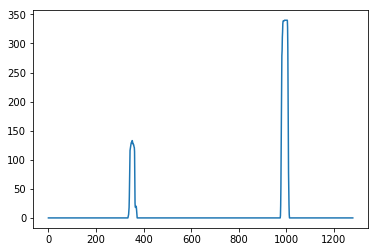

In [250]:
import numpy as np
histogram = np.sum(warped2[warped2.shape[0]//2:,:], axis=0)
plt.plot(histogram)

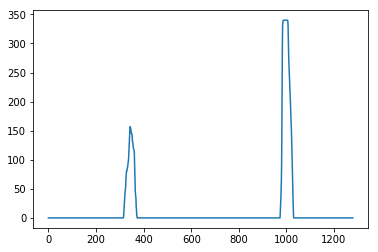

In [251]:
import numpy as np
histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
plt.plot(histogram)

In [252]:
binary_warped = warped2

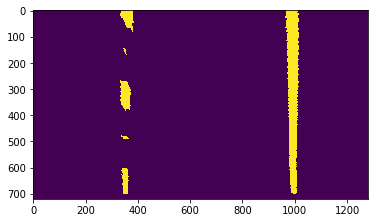

In [253]:
plt.imshow(binary_warped)

In [254]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assuming you have created a warped binary image called "binary_warped"
# Take a histogram of the bottom half of the image
histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)

# Create an output image to draw on and  visualize the result
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

(720, 0)

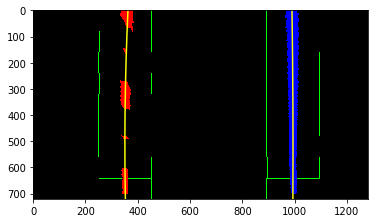

In [255]:
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [256]:
binary_warped.shape

(720, 1280)

(720, 0)

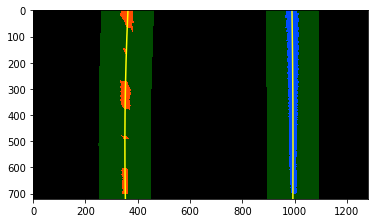

In [257]:
# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [258]:
import numpy as np
import matplotlib.pyplot as plt
# Generate some fake data to represent lane-line pixels
ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
# For each y position generate random x position within +/-50 pix
# of the line base position in each case (x=200 for left, and x=900 for right)
leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                              for y in ploty])
rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y

In [259]:
y_eval = np.max(ploty)

# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m

559.805435647 m 524.27297373 m


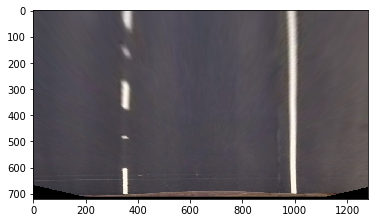

In [260]:
plt.imshow(warped)

In [261]:
Minv = cv2.getPerspectiveTransform(dest, source)

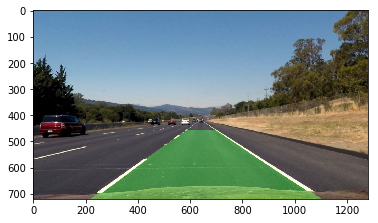

In [262]:
# Create an image to draw the lines on
warp_zero = np.zeros_like(warped2).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
plt.imshow(result)